In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [12]:

runs = {'control' :                    './models/filterFrance/Z64/yrs100/control/'
        #,'0.01 weight ZG' :            './models/filterFrance/Z64/yrs100/fw2..01.2/'
        #,'0 weight ZG' :               './models/filterFrance/Z64/yrs100/fw2.0.2/'              
        #,'0.1 weight ZG' :             './models/filterFrance/Z64/yrs100/fw2..1.2/'
        #,'20 weight TM SM' :            './models/filterFrance/Z64/yrs100/fw20.1.20/'
        #,'0.5 K-L and 0.5 rec':         './models/filterFrance/Z64/yrs100/k.5.5/'
        #,'4 layers':                   './models/filterFrance/Z64/yrs100/lrs4/'
        #,'0.01 K-L and 0.99 rec' :     './models/filterFrance/Z64/yrs100/k.99.01/'
        #,'2 skip' :                    './models/filterFrance/Z64/yrs100/skip2/'
        #,'no dropout/btchnorm' :       './models/filterFrance/Z64/yrs100/nodrpbnrml/'
        #,'decoder without mask' :      './models/filterFrance/Z64/yrs100/nomask/'
        #,'no filters' :                './models/nofilter/Z64/yrs100/nomask/'
        #,'Z8'   :                       './models/filterFrance/Z8/yrs100/control/'
        #,'Z8/0.1 weight ZG' :          './models/filterFrance/Z8/yrs100/fw2..1.2/'     
        #,'Z8/20 weight TM SM' :         './models/filterFrance/Z8/yrs100/fw20.1.20/'
        #,'Z2' :                        './models/filterFrance/Z2/yrs100/control/'
        #,'Z2/0.1 weight ZG' :          './models/filterFrance/Z2/yrs100/fw2..1.2/'
        #,'Z8/ 800 yrs/ control' :      './models/filterFrance/Z8/yrs800/control/'
        #,'Z8/800 yrs/0.1 weight ZG' :  './models/filterFrance/Z8/yrs800/fw20.1.20/'
        #,'500 yrs/ control' :           './models/filterFrance/Z64/yrs500/control/'
        ,'yrs500/fw20.1.20' :   './models/filterFrance/Z64/yrs500/fw20.1.20/'
        ,'yrs500/Z8' :                 './models/filterFrance/Z8/yrs500/control/'
        ,'yrs500/Z8/fw20.1.20' : './models/filterFrance/Z8/yrs500/fw20.1.20/'
        ,'yrs500/Z8/4 layers'  :      './models/filterFrance/Z8/yrs500/fw20.1.20lrs4/'
        ,'yrs500/Z8/fw0.1.0' :  './models/filterFrance/Z8/yrs500/fw0.1.0/'
        ,'yrs500/Z8/fw20.1.20btch1024':'./models/filterFrance/Z8/yrs500/fw20.1.20btch1024/'
        ,'yrs500/Z8/fw20.1.20kip2' :  './models/filterFrance/Z8/yrs500/fw20.1.20skip2/'
        ,'yrs500/Z8/fw40.1.40' :     './models/filterFrance/Z8/yrs500/fw40.1.40/'
        ,'yrs500/Z4/fw20.1.20btch256' : './models/filterFrance/Z4/yrs500/fw20.1.20btch256/'
        ,'yrs500/Z4/fw0.1.0btch256' : './models/filterFrance/Z4/yrs500/fw0.1.0btch256/'
        ,'yrs500/fw0.1.0btch256' : './models/filterFrance/Z64/yrs500/fw0.1.0btch256/'
        ,'yrs500/fw40.1.40btch256' : './models/filterFrance/Z64/yrs500/fw40.1.40lrs4btch256/'
        ,'yrs500/nomaskfw40.1.40btch256' : './models/nofilter/Z64/yrs500/nomaskfw40.1.40btch256/'
        ,'NAonlyfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'Z8/NAfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256/'
        ,'Z8/NAfw20.1.20btch256out.1' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256in1out.1/'
        ,'yrs500/Z8/NAfw0.1.0btch256' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw0.1.0btch256/'
        ,'yrs500/Z8/NAfw20.1.20btch256out.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256in1out.1/'
        ,'yrs500/Z8/NAfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256/'
        ,'NA/Z8/yrs500/fw5.15c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5btch256coef1..1/'
        ,'NA/Z8/yrs500/fw10.1.10c1..5' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..5/'
        ,'NA/Z8/yrs500/fw10.1.10c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1/'
        ,'NA/Z64/yrs500/fw20.1.20c1..1' : './models/filterFranceNorthAtlantic/Z64/yrs500/fw20.1.20btch256coef1..1/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c0' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class0/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c10' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class10/'    
        ,'NA/Z8/yrs500/fw10.1.10c1..1c10' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class10/' 
        ,'NA/Z8/yrs100/fw10.1.10c1..1c1' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class1/'
        ,'NA/Z8/yrs500/fw10.1.10c1..1c1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class1/'
        ,'NA/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1/'
        ,'NA/Z8/yrs5000/fw20.1.20c1..1class0' : './models/filterFranceNorthAtlantic/Z8/yrs5000/fw20.1.20c1..1class0/'
        ,'NA/Z64/yrs5000/fw20.1.20c1..1class0' : './models/filterFranceNorthAtlantic/Z64/yrs5000/fw20.1.20c1..1class0/'
        ,'NA/Z8/yrs500/fw5.1.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5c1..1C.1/'
        ,'Z8/yrs500/fw5.1.5k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw5.1.5k5.5skip2C.1/'
        ,'Z8/yrs500/fw20.1.20k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw20.1.20k.5.5skip2C.1/'
        ,'Z64/yrs500/fw5.1.5k.5.5skip2C.1' : './models/filterFrance/Z64/yrs500/fw5.1.5k.5.5skip2C.1/'
        ,'Z8/yrs500/fw20.1.20skip2C.001' : './models/filterFrance/Z8/yrs500/fw20.1.20skip2C.001/'
        ,'Z8/yrs500/fw5.1.5lrs4C.001' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5lrs4C.001/'
        ,'Z8/yrs500/fw20.1.20lv4C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20lv4C.1/'
        ,'NA/Z8/yrs500/fw20.1.20lrs4C.001' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20lrs4C.001/'
        ,'NA/Z8/yrs500/fw20.1.20C.001' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20skip2c1..1C.001/'
        ,'NA/Z64/yrs500/fw20.1.20lrs4C0' : 'models/filterFranceNorthAtlantic/Z64/yrs500/fw20.1.20lrs4C0/'
        ,'NA/Z8/yrs500/fw20.1.20lrs4C1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20lrs4C1/'
        ,'NA/z64/yrs100/fw20.1.20lrs4c1..1C1' : './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20lrs4c1..1C1/'
        ,'Z64/yrs100/fw2..1.2xarray' : './models/filterFrance/Z64/yrs100/fw2..1.2xarray/'
        ,'Z8/yrs500/fw20.1.20lrs4C1mean' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20c1..1lrs4C1mean/'
        ,'Z8/yrs500/fw20.1.20C1mean' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20c1..1C1mean/'
        ,'Z8/yrs500/fw20.1.20btch1024Ltwo1e-9C.01mean ' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch1024c1..1Ltwo1e-9C.01mean/'
}

In [7]:
runs = { 'control' :                            './models/filterFrance/Z64/yrs100/control/'
        ,'NA/Z64/fw20.1.20' :                   './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'Z8/NAfw20.1.20' :                     './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256/'
        ,'Z8/yrs500/fw40.1.40' :                './models/filterFrance/Z8/yrs500/fw40.1.40/'
        ,'Z8/yrs500/fw40.1.40' :                './models/filterFrance/Z8/yrs500/fw40.1.40/'
        ,'NA/Z64/fw20.1.20' :                   './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'NA/Z8/fw20.1.20c1..1' :               './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256in1out.1/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c0' :      './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class0/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c10' :     './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class10/'     
        }


In [13]:
runs = {'Z64/yrs500/fw20.1.20' :   './models/filterFrance/Z64/yrs500/fw20.1.20/'
        #'Z64/yrs100/fw2..1.2' : './models/filterFrance/Z64/yrs100/fw2..1.2/'
        #,'Z64/yrs100/fw2..1.2xarray' : './models/filterFrance/Z64/yrs100/fw20.1.20xarray/'
         #,'Z8/yrs5000/fw20.1.20' :   './models/filterFrance/Z8/yrs500/fw20.1.20/'
        #,'Z8/yrs500/fw20.1.20' : './models/filterFrance/Z8/yrs500/fw20.1.20/'
        #,'NA/Z64/yrs500/fw20.1.20c1..1' : './models/filterFranceNorthAtlantic/Z64/yrs500/fw20.1.20btch256coef1..1/'
        #,'NA/Z8/yrs500/fw20.1.20c1..0' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256/'
        #,'NA/Z8/yrs500/fw20.1.20c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256in1out.1/'
        #,'NA/Z8/yrs500/fw10.1.10c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1/'
        #,'NA/Z8/yrs500/fw10.1.10c1..1c10' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class10/'
        #,'NA/Z8/yrs500/fw10.1.10c1..1c1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class1/'
        #,'NA/Z8/yrs500/fw20.1.20c1..1c0' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256c1..0class0/'
        #,'NA/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1/'
        #,'NA/Z8/yrs500/fw5.1.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5c1..1C.1/'
        #,'Z8/yrs500/fw5.1.5k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw5.1.5k5.5skip2C.1/'
        #,'Z8/yrs500/fw20.1.20k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw20.1.20k.5.5skip2C.1/'
        #,'Z64/yrs500/fw5.1.5k.5.5skip2C.1' : './models/filterFrance/Z64/yrs500/fw5.1.5k.5.5skip2C.1/'
        #,'Z8/yrs500/fw20.1.20skip2C.001' : './models/filterFrance/Z8/yrs500/fw20.1.20skip2C.001/'
        #,'NA/Z8/yrs500/fw5.1.5lrs4C.001' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5lrs4C.001/'
        #,'NA/Z8/yrs500/fw20.1.20lv4C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20lv4C.1/' 
        #,'NA/Z8/yrs500/fw20.1.20lrs4C.001' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20lrs4C.001/'
        #,'NA/Z8/yrs500/fw20.1.20C.001' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20skip2c1..1C.001/'
        #,'NA/Z64/yrs500/fw20.120lrs4C0' : 'models/filterFranceNorthAtlantic/Z64/yrs500/fw20.1.20lrs4C0/'
        #,'NA/Z8/yrs500/fw20.1.20lrs4C1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20lrs4C1/'  
        #,'NA/Z64/yrs100/fw20.1.20lrs4c1..1C1' : './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20lrs4c1..1C1/' 
        #,'NA/Z64/yrs100/fw20.1.20lrs4c1..1C1mean' : './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20lrs4c1..1C1mean/'
        ,'Z8/yrs500/fw20.1.20lrs4C1mean' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20c1..1lrs4C1mean/'
        ,'Z8/yrs500/fw20.1.20C1mean' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20c1..1C1mean/'
        ,'Z8/yrs500/fw20.1.20btch1024Ltwo1e-9C.01mean ' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch1024c1..1Ltwo1e-9C.01mean/'
        }

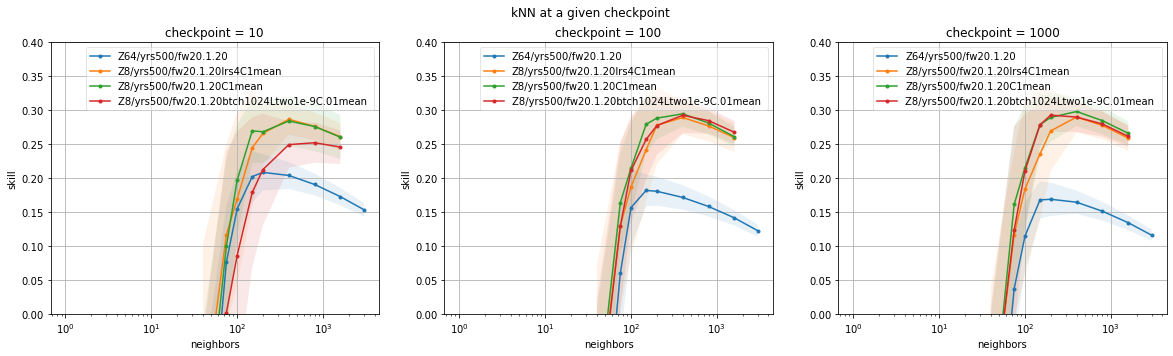

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [14]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('kNN at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)

for i, checkpoint in enumerate([10,100,1000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        if checkpoint in score.checkpoint.values:
            if 'kNN_uni' in  score.method.values:
                meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
                stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2))
                maxiter=100
                ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
                ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
            else:
                ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
                
        else: # the idea is to keep the colormap despite not having the line
            ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
    ax1.set_xlabel('neighbors')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.4])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.grid(True)
fig.savefig('./Images/class_KNN.png',dpi=200)

/tmp/ipykernel_1955259/1760658897.py:18: RuntimeWarning: invalid value encountered in multiply
  ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
/tmp/ipykernel_1955259/1760658897.py:18: RuntimeWarning: invalid value encountered in multiply
  ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')


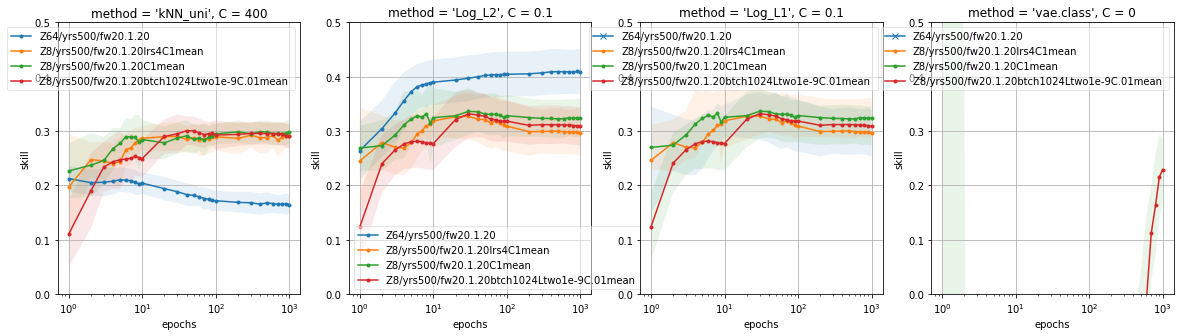

In [15]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('')

axs = fig.subplots(nrows=1, ncols=4)

for i, (C, method) in enumerate(zip([400,0.1,0.1,0],['kNN_uni', 'Log_L2','Log_L1','vae.class'])):
    ax1 = axs[i]
    for name, folder in runs.items():
        score = pd.read_csv(f'{folder}score.csv') 
        if method in  score.method.values:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2)) # The last command gets rid of C and method in the output
            stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2))
            maxiter=100
            ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
            ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
        else:
            ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.5])
    ax1.set_xscale("log")
    ax1.set_title(f"{method = }, {C = }")
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.grid(True)
    fig.savefig('./Images/class_epochs.png',dpi=200)

In [2]:
folder = './models/testruns/test2/'

(0.0, 1.0)

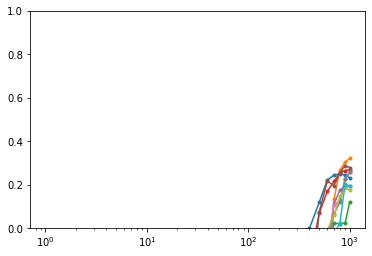

In [19]:
# folder = runs['Z64/yrs100/fw20..1.20']
score = pd.read_csv(f'{folder}score.csv') 
for fold in list(score['fold'].unique()):
    foldskill = score.loc[(score['fold'] == fold) & (score['C'] == 0) & (score['method'] == 'vae.class'),('checkpoint','skill')]
    plt.plot(foldskill.values[:,0],foldskill.values[:,1],'.-')
plt.xscale('log')
plt.ylim(0,1)

0.0014214895199984312
0.0019108911510556936
0.0018063999013975263
0.0014601940056309104
0.001498195342719555
0.0014792075380682945
0.0014841927913948894
0.0014524825382977724
0.0014215377159416676
0.0014663912588730454


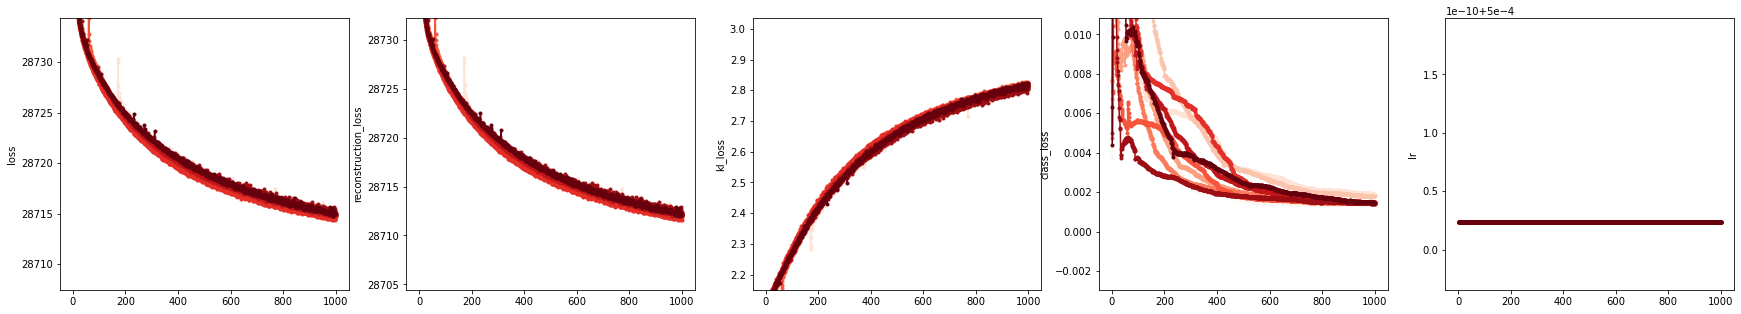

In [17]:
# folder = runs['Z64/yrs100/fw20..1.20xarray']
fig = plt.figure()
fig.set_size_inches(30, 5)
fig.suptitle('')

axs = fig.subplots(nrows=1, ncols=5)
nfolds=10    
color_idx = np.linspace(0, 1, nfolds)
for i in range(nfolds):
    history = np.load(f'{folder}/fold_{i}/history_vae', allow_pickle=True)#.item()
    print(history['class_loss'][-1])
    for j, key in enumerate(history):
        ax1 = axs[j]
        epochs = range(1, len(history[key])+1)
        if i ==nfolds-1:
            label =f'{key}_{i}'
        else:
            label =''
        
        cmap = plt.cm.Reds(color_idx[i])
        ax1.plot(epochs, history[key], label =i, linestyle='solid', marker='.', color = cmap)

        ax1.set_ylabel(key)
        test = np.array(history[key])[np.isfinite(history[key])]
        if key == 'kl_loss':
            #print('kl_loss',np.nanmean(test)-2*np.nanstd(test),np.nanmean(test)+2*np.nanstd(test))
            ax1.set_ylim(np.nanmean(test)-2*np.nanstd(test),np.nanmean(test)+2*np.nanstd(test) )
        #    # ax1.set_ylim(np.array(history[key]).max() - 0.1*(np.array(history[key]).max() - np.array(history[key]).min()),np.array(history[key]).max())
        else:
            #print(np.nanmean(test)-2*np.nanstd(test),np.nanmean(test)+2*np.nanstd(test))
            ax1.set_ylim(np.nanmean(test)-2*np.nanstd(test),np.nanmean(test)+2*np.nanstd(test) )
        #    ax1.set_ylim(np.percentile(history[key],5), np.percentile(history[key],95))
# ax1.set_ylim(np.array(history[key]).min(),np.array(history[key]).min()+0.1*(np.array(history[key]).max() - np.array(history[key]).min()))

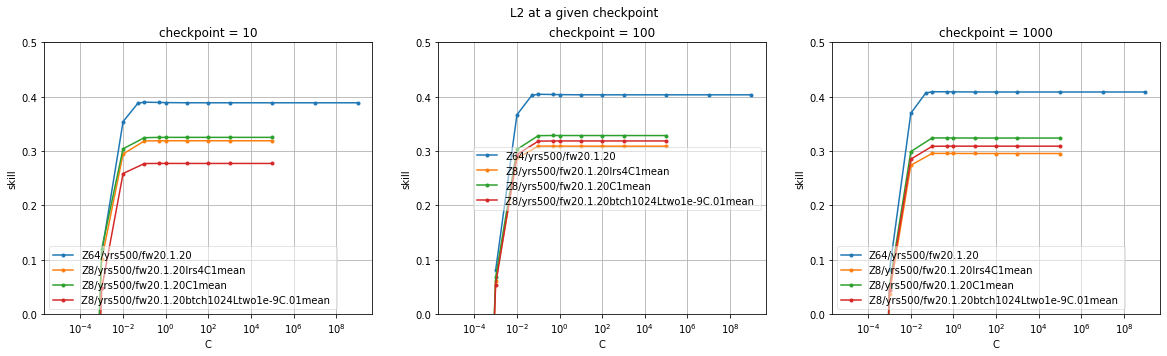

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [18]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('L2 at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)
method = 'Log_L2'
for i, checkpoint in enumerate([10,100,1000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv')
        if method in  score.method.values:
            if checkpoint in score.checkpoint.values:
                meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),method), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
                stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),method), 'skill'].droplevel(level=(0,2))
                maxiter=100
                #ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
                ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
            else:
                meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(10, slice(None),method), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
                ax1.plot(meanskillvsckpt.index[:maxiter],np.inf*meanskillvsckpt.values[:maxiter],label=name, marker='.')

    ax1.set_xlabel('C')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.5])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.grid(True)
fig.savefig(f'./Images/class_{method}.png',dpi=200)

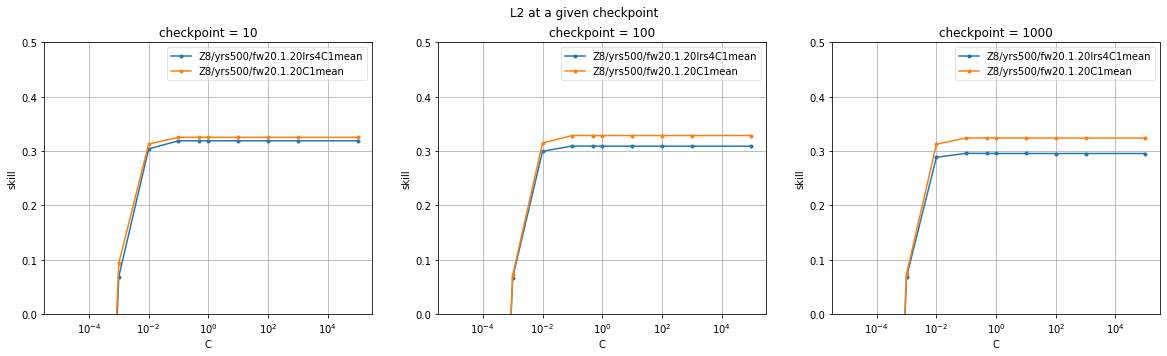

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [44]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('L2 at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)
method = 'Log_L1'
for i, checkpoint in enumerate([10,100,1000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv')
        if method in  score.method.values:
            if checkpoint in score.checkpoint.values:
                meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),method), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
                stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),method), 'skill'].droplevel(level=(0,2))
                maxiter=100
                #ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
                ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
            else:
                meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(10, slice(None),method), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
                ax1.plot(meanskillvsckpt.index[:maxiter],np.inf*meanskillvsckpt.values[:maxiter],label=name, marker='.')

    ax1.set_xlabel('C')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.5])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.grid(True)
fig.savefig(f'./Images/class_{method}.png',dpi=200)